In [ ]:
#SKYSPORT NEWS BOT...
#importing request module.

import yagmail #module for gmail request
import requests
from scrapy.selector import Selector

#url, get_url are variables
url = 'https://www.skysports.com/football/news'
get_url = requests.get(url) # visisting the site
links = Selector(text=get_url.text).css('.news-list__headline-link ::attr(href)').getall() #after checking the response.css in scrapy shell, we use Selector(text=variable.text).css('blalbla used in scrapy shell')
#.text makes the Selector request for the HTML page, .css search for the class & attributes with those names 
#using a for statment to loop through (for each links in all the links)
for link in links:
    get_page = requests.get(link) #(get each link) because it is in the for statement
    get_article = Selector(text =get_page.text).css('.sdc-article-header__titles ::text').getall() + Selector(text =get_page.text).css('.sdc-article-body.sdc-article-body--lead p::text').getall()
    #we use + to select two classes(concatinate in a way), in the case, the first selector was for the head, the second selector was for the body
    # the p is to specify paragraph text element
    #scrapy is a bastard thst doesent allow two class in in a selector, so we went to Stackoverflow, and above is the right way to select two classes

    #get_article = Selector(text =get_page.text).css('.sdc-article-body.sdc-article-body--lead p::text').getall() #for body
    #get_article_header = Selector(text =get_page.text).css('.sdc-article-header__titles ::text').getall() # header for he
    
    email_content = ''.join(get_article) # assigning email_content to the get_article scrapped. to be used as content to be sent
    
    try:
        yag = yagmail.SMTP(user = 'makanjuola.timi@gmail.com', password='') #sender Credentials
        #yag.send(to='makanjuolaemma81@gmail.com', subject = 'Skysport Werey news', contents = email_content) #reciever and contents of message
        print('werey have almost killed me')
    except Exception:
        print('oloriburuku still get error')
    
    
    

In [ ]:
#Punch website
import yagmail
import requests
from scrapy.selector import Selector

url = 'https://punchng.com/topics/news/'
get_url = requests.get(url)
links=Selector(text=get_url.text).css('.entry-title ::attr(href)').getall()
for link in links:
    visit_link = requests.get(link)
    article_content = Selector(text=visit_link.text).css('.entry-header h1::text').getall() + Selector(text=visit_link.text).css('.entry-content p::text').getall()
    email_content = ''.join(article_content)
    
    #print(email_content)
    
    try:
        yag = yagmail.SMTP(user = 'makanjuola.timi@gmail.com', password = 'johnnycage')
        yag.send(to = 'kunle.makanjuola@yahoo.com', cc = 'makanjuolaemma81@gmail.com', subject = 'Punch news', contents = email_content) # cc is carbon copy
        print('Sent sucessfully')
    except Exception:
        print('i am gonna kill the bug')

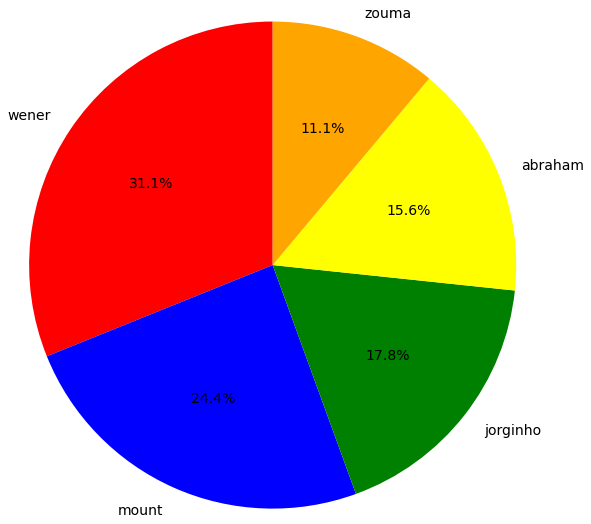

,player Name,gc
1,wener,14
2,mount,11
0,jorginho,8
3,abraham,7
4,zouma,5


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stats = pd.read_csv('chelsea_2020stats.csv')
stats['gc'] = stats[' goals'] + stats[' assits'] # intializing a new column in stats as [gc] and assinging value to it, ***it is important to assingn value 
#sorting the values by coulmn gc(goal conribution)
stats.sort_values('gc',inplace=True, ascending=False) #inplace = True, makes the change active on the current DataFrame, ascending=False makes the arrangment accending

stats = stats[['player Name', 'gc']] #defining the columns to be ploted...
color_cycle = ['red', 'blue', 'green', 'yellow','orange'] #listing colours to use..
plt.pie(stats['gc'], labels=list(stats['player Name']), shadow= False,
        radius=2.8, textprops={'fontsize': 14}, startangle=90,
        explode=[0,0,0,0,0], colors=color_cycle, autopct= lambda x: f"{x:.1f}%") # everything in this bracket is plotlib snytax and all, explode[0,0,0,0,0], the zeros are important (i.e to represent) the five(5) values we want to use on the pie chart.
plt.show() # to display the pie chart
stats.columns # to show the list of columns in form of an array
stats['player Name'] # shows only column player Names
stats

In [ ]:
#using streamlit, i.e making the app run as a website(web app)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st    #importing streamlit

st.title('Timmies\s Chelsea stats web app')   #
stats = pd.read_csv('chelsea_2020stats.csv')
stats['gc'] = stats[' goals'] + stats[' assits']
stats.sort_values('gc', inplace =True, ascending=False)

stats = stats[['player Name', 'gc']]
fig, ax = plt.subplots()   #indicating that fig is the figure to be ploted.
color_cycle = ['red', 'blue', 'green', 'yellow','orange']
plt.pie(stats['gc'], labels=list(stats['player Name']), shadow = False, radius= 2.8, textprops={'fontsize': 14},
        startangle=90, explode=[0,0,0,0,0], colors=color_cycle, autopct= lambda x: f"{x:.1f}%")
st.pyplot(fig)   #passing the figure to show as a chart


In [ ]:
#Natural Language Processing, using textblob library
from textblob.classifiers import NaiveBayesClassifier

#import nltk
#nltk.download('punkt')

#The two line above in comments is needed with internet connection after that you can off the internet...

train = [
    ('the place is awesome', 'pos'),
    ('they serve the best dishes', 'pos'),
    ('good customer service', 'pos'),
    ('the food taste very nice', 'pos'),
    ('the food are tasty', 'pos'),
    ('a great place to relax', 'pos'),
    
    ('the food is terrible', 'neg'),
    ('the place has bad customer service', 'neg'),
    ('the place atmosphere was bad', 'neg'),
    ('the menu are bad', 'neg'),
    ('the waiters delay the food', 'neg'),
    ('the food are too spicey', 'neg')
]

test = [
    ('the amtosphere was nice', 'pos'),
    ('the staffs were friendly', 'pos'),
    ('the chicken was soft', 'pos'),
    
    ('it wasnt a good experience', 'neg'),
    ('the food is blad', 'neg'),
    ('the desert was too small', 'neg')
]

cl = NaiveBayesClassifier(train)
cl.classify("the food is good") #An example to use to test the classifier
cl.accuracy(test) #To test for the accuracy of the model gan gan
cl.classify('the customer service is good')


In [ ]:
#cl.classify("the meal was good")
#import nltk
#nltk.download('punkt') 

#this is used to download the classifier only once.

In [ ]:
#PYTHON MACHINE LEARNING(DATA SCIENCE)  a small refresh
import pandas as pd

df = pd.read_csv('vgsales.csv')
df.shape #shape of row and colums
df.describe()  # for statistical infrormation on the data columb
df.values #values of each row put into an array

In [ ]:
#PYTHON MACHINE LEARNING(DATA SCIENCE)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

music_data = pd.read_csv('music.csv')
#we want to split the data set into input and output data.input(age & gender), output(genre)... we use input to predict output.

X = music_data.drop(columns = ['genre']) #creating a new data set without genre. i.e input data
#we use capital (X) by covention for our input data
y = music_data['genre'] # to get the genre column
#we use small (y) by convention to represent output/expectation/prediction.

model = DecisionTreeClassifier() # creating an instance of decision tree
model.fit(X, y) #training the model to learn pattern from the data, i.e comparing input to output.
prediction = model.predict([[21, 1], [22, 0]]) #to predict
prediction 
#prediction = model.predict([[21, 1]]) # to predict for one i.e male

In [ ]:
#PYTHON MACHINE LEARNING(DATA SCIENCE)
#MEASURING THE ACCURACY OF THE PRDICTION MODEL
#to do this we need to split our data into two set, one for training and the other for testing

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #to split the data into train and test
from sklearn.metrics import accuracy_score    # to check accuracy

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns = ['genre'])
y = music_data['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #0.2 for 20% test size

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

score = accuracy_score(y_test, prediction)
score

In [ ]:
#PYTHON MACHINE LEARNING(DATA SCIENCE)
#Persisting a model... dumping/loading the model...

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib #for saving and loadin modules

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns = ['genre'])
y = music_data['genre'] 

model = DecisionTreeClassifier()
model.fit(X, y) 

joblib.dump(model, 'music-recommender.joblib')

#prediction = model.predict([[21, 1], [22, 0]])

In [ ]:
#PYTHON MACHINE LEARNING(DATA SCIENCE)
#Persisting a model... loading the model

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib #for saving and loadin modules

# music_data = pd.read_csv('music.csv')
# X = music_data.drop(columns = ['genre'])
# y = music_data['genre'] 

# model = DecisionTreeClassifier()
# model.fit(X, y)    

#after you highlight what you want to comment, just press ctrl + / to comment it 

model = joblib.load('music-recommender.joblib')
prediction = model.predict([[21, 1]])
prediction  

In [ ]:
#PYTHON MACHINE LEARNING(DATA SCIENCE)
#Visuallizing the Decision Tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #for visualization

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns = ['genre'])
y = music_data['genre'] 

model = DecisionTreeClassifier()
model.fit(X, y) 

#the .dot format is a graph description language
tree.export_graphviz(model, out_file='music-recommender.dot',
                    feature_names=['age','gender'],
                    class_names=sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

In [ ]:
#PYTHON MACHINE LEARNING
#DT with input
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

music_data = pd.read_csv('music.csv')
X = music_data.drop(columns = ['genre'])
y = music_data['genre'] 

model = DecisionTreeClassifier()
model.fit(X, y) 

print('enter age')
a = input()
#print(a)
print('enter gender')
b = input()

specific_prediction = model.predict([[a,b]])
specific_prediction
# prediction = model.predict([[21, 1], [22, 0]])
# prediction 

In [ ]:
# PLOTTING DATA ON A GRAPH USING MATPLOTLIB(BASIC)
import matplotlib.pyplot as plt
x= [i for i in range(10)] #array of 10 elements
y= [2*i for i in range(10)] #all elements *2

plt.plot(x,y) #plots the graph
plt.xlabel('x-axis') #normal convention naming
plt.ylabel('double axis') #the label worked 


     rating
4.0   28750
3.0   20064
5.0   15095
3.5   10538
4.5    7723
2.0    7271
2.5    4449
1.0    3326
1.5    1687
0.5    1101


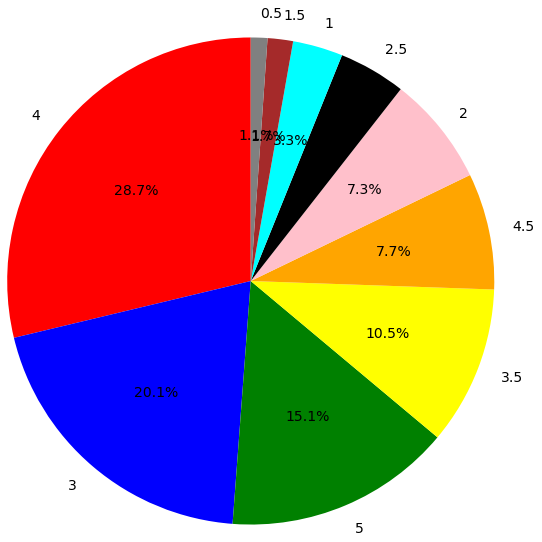

In [67]:
# PLOTTING DATA ON A GRAPH USING MATPLOTLIB(BASIC) USING MOVIES RATINGS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratin = pd.read_csv('ratings_smalli.csv')
i2p5 = ratin[ratin.rating == 2.5]
i2 = ratin[ratin.rating == 2]
i3 = ratin[ratin.rating == 3]
i4 = ratin[ratin.rating == 4]
z = ratin['rating'].value_counts() #To help sort out distinct values 
newz = pd.DataFrame(z)
print(newz)
newz.rename(columns ={'':'ratings', 'rating':'amount'}, inplace = True) #name column
label = ['4', '3','5','3.5','4.5','2','2.5','1','1.5','0.5']
label

color_cycle = ['red', 'blue', 'green', 'yellow','orange','pink','black','cyan','brown','gray'] #listing colours to use..
plt.pie(newz['amount'], labels=list(label), shadow= False,
        radius=2.8, textprops={'fontsize': 14}, startangle=90,
        explode=[0,0,0,0,0,0,0,0,0,0], colors=color_cycle, autopct= lambda x: f"{x:.1f}%") # everything in this bracket is plotlib snytax and all, explode[0,0,0,0,0], the zeros are important (i.e to represent) the five(5) values we want to use on the pie chart.
plt.show() # to display the pie chart




#plt.plot(rating['movieId'], rating['rating'],'o')
#plt.xlabel('movies') #normal convention naming
#plt.ylabel('ratings')
#plt.show()

In [ ]:
plt.scatter(x,y) #shows data pionts

In [ ]:
#TRAIN TEST SPLIT
from sklearn import datasets #generate dataset
import numpy as np
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() # i think loads data set

#split data in features and labels
X = iris.data   #features
y = iris.target #labels

#print(X,y)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# KNN(K-Nearest Neighbor), Re-Label & Mapping Example
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics   # for KNN and Metrics(accuracy) 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder     #to relabel stings to intigers
import matplotlib.pyplot as plt

data = pd.read_csv('car.data')
# print(data.head())  prints the head, like the first four elements

X = data[['buying','maint','safety']].values # we are using .values because the data here are strings, that will later be converted to intergers using LabelEncoding
y = data[['class']]  #the [[]] makes it more arranged

#print(X,y)

#since we are using a classification algorithm, it does not accept strings so we have to change most of the labels that have string data values to numbers.
#converting data(we try two differeents style for X and y)
#converting X
Le = LabelEncoder()         #calling the LebelEncoder with assigned variable Le
for i in range(len(X[0])):   #X[0] is simply 3 for x columns(default stuffs)
    X[:, i] = Le.fit_transform(X[:, i])   #covert each string data by '1'
    
# print(X)

#converting y (using label mapping conversion)
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
    
}

y['class'] = y['class'].map(label_mapping)
y = np.array(y)  #this helps put y back in an array, beacuse after the mapping data might scatter.
# y

#creating the KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')   #the KNN model, n_neighbors is 'k'
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)      #spliting data and selecting test size
knn.fit(X_train,y_train) #input and output data for the knn model.
prediction = knn.predict(X_test)   #predict test data

# superx = knn.predict([[1,1,3]])
# superx     to predict index 20

accuracy = metrics.accuracy_score(y_test, prediction)
print('prediction:', prediction)
print('accuracy:', accuracy)

print('actual value:', y[20])   #because we use numpy np.array that is why we can use index here
print('predicted value:', knn.predict(X)[20])   #to predict the values on index 20, this is also a way to test the model.

plt.plot(X,y)

In [ ]:
#SVM
from sklearn import datasets #generate dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm     #for svm library
from sklearn.metrics import accuracy_score

iris = datasets.load_iris() # i think loads dataset, the iris dataset is a classic dataset

#split data in features and labels
X = iris.data   #features
y = iris.target #labels

classes = ['Iris Setosa','Iris Versicolour','Iris Virginica']

#print(X,y)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

model = svm.SVC() #.SVC is Support Vector Classicfication 
model.fit(X_train,y_train)
prediction = model.predict(X_test)
acc = accuracy_score(y_test,prediction)

prediction
acc

#to assign name to the predicted outputs
for i in range(len(prediction)):
    print(classes[prediction[i]])  #prints the name in the order

In [ ]:
#Linear Regression
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

boston = datasets.load_boston()

#features/attributes & label
X = boston.data
y = boston.target

#Linear Regression model algorithm
model = linear_model.LinearRegression()
plt.scatter(X.T[5],y) # only for the first intance of data
plt.show

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#train
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print('prediction:', prediction)
print('R^2 value:', model.score(X, y))# R^2 accuracy score for regression
print('coeffiecient factor:', model.coef_)# more like the slope
print('intercept:', model.intercept_)# 

In [ ]:
#KMeans 
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans   #KMeans model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale #help scale and clean data to be more presentable
import pandas as pd

bc = load_breast_cancer()
#we use small 'x' beacuse we are using clustering groups.
x = scale(bc.data)    #using scale to clean data
y = bc.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=6)
model = KMeans(n_clusters=2, random_state=0) # cluster is the number of centroid, the random state = 0 makes it random unlike we affixing a number.
model.fit(x_train) #we dont pass in a 'y', becuase this is clustering, the algorithm does the separation
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

labels = model.labels_    #to give labels/ keep track of labels

print('labels:', labels)
print('predictions:', predictions)
print('accuracy', accuracy)
print('actual values:', y_test)

#fix the bench k_means later.
 

In [ ]:
#Handwritting Digit Recognizer
from PIL import Image #for image
import mnist    #The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.8
import numpy as np
from sklearn.neural_network import MLPClassifier #MLPClassifier stands for Multi-layer Perceptron classifier
from sklearn.metrics import confusion_matrix


#creating training variables
#for training
x_train = mnist.train_images()
y_train = mnist.train_labels()

#for testing
x_test = mnist.test_images()
y_test = mnist.test_labels()

print(x_train.ndim)

print('x_train:', x_train)
print('x_test:', x_test)
print('y_train:', y_train)
print('y_test:', y_test)

In [ ]:
#note
# Neural Neteworks works better with number rangingfrom 0-1 so we scale down our dataset
x_train = (x_train/256)
x_test = (x_test/256)

In [ ]:
#TensorFlow crash course...(neural network)
import tensorflow as tf
from tensorflow import keras #it is a API from tensorflow thst does a lot of work for us and make us write less code
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist #a dataset inside keras we will be using in the future
#slipting data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

#creating list for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#scaling down our data
train_images = train_images/255
test_images = test_images/255

# print(train_images[7])  #prints the array value of image

#images are in 28 by 28
# plt.imshow(train_images[7], cmap=plt.cm.binary)   # to display image
# plt.show()
# print(train_labels[0]) the labels are within 0 and 9


#creating a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#setting some parameters
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5) #epochs means the number of times a particular data is seen, so as to create a consistency after a pattern or a particular data is seen, to sort get more accuracy
#more epochs dosent necesarry mean more accuracy but we can tweak it

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test acc:', test_acc)


#using model to make prediction
prediction = model.predict(test_images)

#checking for validation
for i in range(5):
    plt.grid(False)   #see image
    plt.imshow(test_images[i], cmap=plt.cm.binary) #show image
    plt.xlabel('actual:' + class_names[test_labels[i]]) #for actual ouptut
    plt.title('prediction:' + class_names[np.argmax(prediction[i])]) #for predicited output
    plt.show()
# print("prediction:", class_names[np.argmax(prediction[0])])#np.argmax takes the highest number, and put it in the label class_name

In [ ]:
#TensorFlow TextClassification
import tensorflow as tf
from tensorflow import keras
import numpy as np

data = keras.datasets.imdb
(train_images, train_labels), (test_images, test_labels) = data.load_data(num_words=10000)#this means takes words that only occur 10000 or more times in the dataset, because of the large dataset
 


In [ ]:
# BASIC MOBILE HELLO WORLD APP
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QLabel

# Create the application and the main window
app = QApplication(sys.argv)
window = QWidget()

# Create a button and a text label
button = QPushButton('Click me!')
label = QLabel('Hello, world!')

# Show the button and the text label in the main window
window.show()
button.show()
label.show()

# Start the application
app.exec_()
